#  Academic Integrity Declaration

Academic Integrity and Learning Statement

By submitting my work, I confirm that:

1. The code, analysis, and documentation in this notebook are my own work and reflect my own understanding.
2. I am prepared to explain all code and analysis included in this submission.

If I used assistance (e.g., AI tools, tutors, or other resources), I have:

- Clearly documented where and how external tools or resources were used in my solution.
- Included a copy of the interaction (e.g., AI conversation or tutoring notes) in an appendix.

I acknowledge that:

- I may be asked to explain any part of my code or analysis during evaluation.
- Misrepresenting assisted work as my own constitutes academic dishonesty and undermines my learning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

#importing useful librairies

# A: Quick overview of the dataset

In [2]:
#1

df = pd.read_csv('p1_communes.csv')

#importing data

In [3]:
#2

df.shape

#plotting (number of rows, number of columns) 

(2202, 17)

In [4]:
#3 

df.head(8)

# Plotting the first rows

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543
5,ZH,Kappel am Albis,de,1157,146.085859,25.237684,60.760588,14.001729,465,7.92,8.312020,69.948849,20.588235,1.150895,2682400,1231300,559
6,ZH,Knonau,de,2373,366.769706,23.893805,61.061947,15.044248,925,6.47,18.027735,62.249615,17.103236,2.619414,2677500,1230900,454
7,ZH,Maschwanden,de,656,139.872068,23.018293,59.756098,17.225610,272,4.69,8.974359,59.615385,23.717949,7.692308,2674800,1232000,410


In [5]:
#4

df.index

# Getting the index values

RangeIndex(start=0, stop=2202, step=1)

In [6]:
df.columns.to_list() 

# Putting the columns into a list

['Canton',
 'Commune',
 'Language',
 'Residents',
 'Population density per km²',
 '0-19 years',
 '20-64 years',
 '65 years or over',
 'Private households',
 'Surface area in km²',
 'Settlement area',
 'Agricultural area',
 'Wooded area',
 'Unproductive area',
 'East coordinate',
 'North coordinate',
 'Elevation']

In [7]:
#5

df.dtypes

# Getting the columns data type

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

In [8]:
#6

df.info()

# We can see that columns 0 and 2 have missing values since the number of data in each is not 2202

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2199 non-null   object 
 1   Commune                     2202 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2202 non-null   int64  
 4   Population density per km²  2202 non-null   float64
 5   0-19 years                  2202 non-null   float64
 6   20-64 years                 2202 non-null   float64
 7   65 years or over            2202 non-null   float64
 8   Private households          2202 non-null   int64  
 9   Surface area in km²         2202 non-null   float64
 10  Settlement area             2202 non-null   float64
 11  Agricultural area           2202 non-null   float64
 12  Wooded area                 2202 non-null   float64
 13  Unproductive area           2202 

In [9]:
col_with_na=list()

for col in df.columns:
    sum_na_values = df[col].isna().sum()
    if sum_na_values > 0:
        col_with_na.append(col)

col_with_na

# Creating a list that shows the columns containing missing values

['Canton', 'Language']

In [10]:
#7 

df.dropna(inplace=True) 

# Removing every row that contains at least a missing value

In [11]:
df.info()

# We can see that all the columns have the same "Non-Null Count" so that their isn't any columns that is missing values 
# All the columns have the same data type

<class 'pandas.core.frame.DataFrame'>
Index: 2191 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2191 non-null   object 
 1   Commune                     2191 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2191 non-null   int64  
 4   Population density per km²  2191 non-null   float64
 5   0-19 years                  2191 non-null   float64
 6   20-64 years                 2191 non-null   float64
 7   65 years or over            2191 non-null   float64
 8   Private households          2191 non-null   int64  
 9   Surface area in km²         2191 non-null   float64
 10  Settlement area             2191 non-null   float64
 11  Agricultural area           2191 non-null   float64
 12  Wooded area                 2191 non-null   float64
 13  Unproductive area           2191 non-n

# B. Exploration: numerical summaries, indexing and grouping


In [12]:
# 1

round(df[[commune for commune in df.columns if df[commune].dtype!="object"]].describe().loc[['mean','min','max']].T,2)

#Getting the mean, min, max values for each numerical column

#The comprehension list select the columns that have numerical values (removing Canton, Commune,Language)

#The transposition method .T allows to make the dataframe permutate, I find it a bit more pleasant

#I also chose to round up the values

,mean,min,max
Residents,3865.30,11.00,415367.00
Population density per km²,433.42,0.90,12669.05
0-19 years,20.59,0.00,37.78
20-64 years,60.37,18.18,77.92
65 years or over,19.04,6.27,81.82
Private households,1702.49,10.00,201252.00
Surface area in km²,17.97,0.31,438.63
Settlement area,14.88,0.14,97.26
Agricultural area,45.93,0.00,91.51
Wooded area,32.58,0.00,88.24


In [13]:
#2

df.sort_values(by="Residents", ascending=False)[["Residents","Commune","Canton"]].head(10)

# Getting the most populated communes, ordered by number of residents in an descending manner

# I wanted to plot the Canton also, it is a bit more readable and nice

,Residents,Commune,Canton
154,415367,Zürich,ZH
2124,201818,Genève,GE
910,172258,Basel,BS
1749,139111,Lausanne,VD
194,133883,Bern,BE
141,111851,Winterthur,ZH
535,81691,Luzern,LU
1053,75833,St. Gallen,SG
1582,63185,Lugano,TI
207,55159,Biel/Bienne,BE


In [14]:
#3

df.sort_values(by="Residents", ascending=True)[["Residents","Commune","Canton"]].head(10)

# Getting the least populated communes, ordered by number of resident, in an ascending manner

,Residents,Commune,Canton
1546,11,Corippo,TI
875,28,Kammersrohr,SO
2011,33,Bister,VS
366,36,Schelten,BE
370,41,Rebévelier,BE
485,45,Berken,BE
1629,45,Cerentino,TI
342,46,Clavaleyres,BE
1627,46,Bosco/Gurin,TI
1160,46,Lohn (GR),GR


In [15]:
#4
list_of_cantons = df["Canton"].unique().tolist()

for canton in list_of_cantons:
    canton_df=df[df["Canton"]==canton]
    new_filename=canton + ".csv"
    canton_df.to_csv(new_filename, encoding="utf-8")
    
#creating a csv file for each Canton containing all the datas

In [16]:
#5

pop_by_canton = df.groupby("Canton")["Residents"].sum()
area_per_canton = df.groupby("Canton")["Surface area in km²"].sum()

#Here is a way to get the number of residents per canton, using the groupby method
#Same with the area per canton 

pop_density = pd.DataFrame(pop_by_canton/area_per_canton, columns=["Population density"])

# As groupby.sum() gives a Serie, by doing the statement above, we can define a DataFrame via this Serie 

pop_density.sort_values(by="Population density", ascending=False)


,Population density
Canton,
BS,5271.069012
GE,2031.893255
ZH,948.443099
ZG,612.265881
BL,556.593969
AG,486.145498
SO,345.618319
TG,320.320701
LU,286.577848


We can see that the 2 most dense cantons are Basel (Stadt) and Geneva. This makes sense since those are really small cantons containing two of the biggest cities in Switzerland. As well, we are not surprised to observe that the Grisons is the least dense, since it is the biggest canton and a known for its mountains and fields. 

In [17]:
#6
df1= df[df["20-64 years"]>50][["Canton","Commune", "20-64 years"]].copy() 

#creating a simple a copy of the main dataframe allowing us to see things much simplier with the data we want

df1.Canton.value_counts()

#counts the time a Canton occur in this dataframe, which is the same as counting the number of communes

Canton
BE    339
VD    309
AG    210
ZH    158
FR    131
VS    124
TI    113
SO    109
GR    100
BL     86
LU     82
TG     80
SG     77
JU     53
GE     45
NE     30
SZ     29
SH     26
AR     20
UR     20
ZG     11
NW     11
OW      7
AI      6
BS      3
GL      3
Name: count, dtype: int64

In [18]:
#7

mx_elevation = df.groupby("Canton")["Elevation"].max()
min_elevation = df.groupby("Canton")["Elevation"].min()
diff_elevation = mx_elevation-min_elevation
diff_elevation.sort_values(ascending=False).head(5)

Canton
VS    2610
TI    2044
BE    2025
GR    2017
UR    1871
Name: Elevation, dtype: int64

This result isn't surprising. Indeed, Valais has communes in the plains (for example Martigny or Sion are cities around 400m of altitude, as well as really high-altitude mountain communes. 

In fact, the plotted cantons are mountain cantons so the observation that I made for Valais also applies for the four other cantons.

# C. Exploration: visualizations

In [19]:
#1

most_populated = df.sort_values(by="Residents", ascending=False)[["Commune","Residents"]].head(10)

# Here what have taken the same result as in B.2, except that we change the columns to take, here 
# we have taken only the Commune and Resident columns

commune_names = most_populated["Commune"].to_list()

# Changing the series into a list

pop = most_populated["Residents"].to_numpy()

# Same here with residents but we store the series into a numpy array

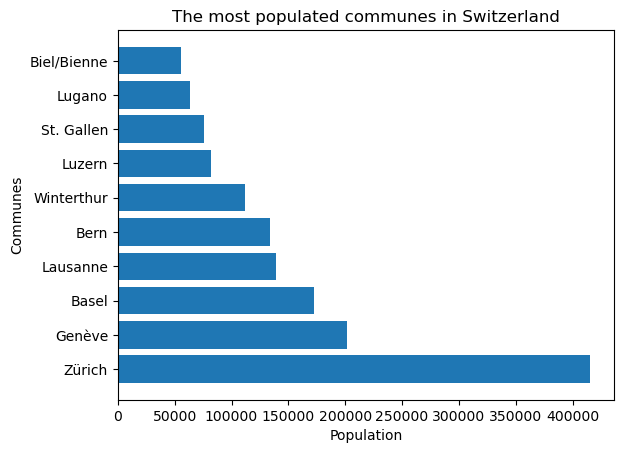

In [20]:
plt.barh(commune_names, pop)
plt.title("The most populated communes in Switzerland")
plt.xlabel("Population")
plt.ylabel("Communes")
plt.show()

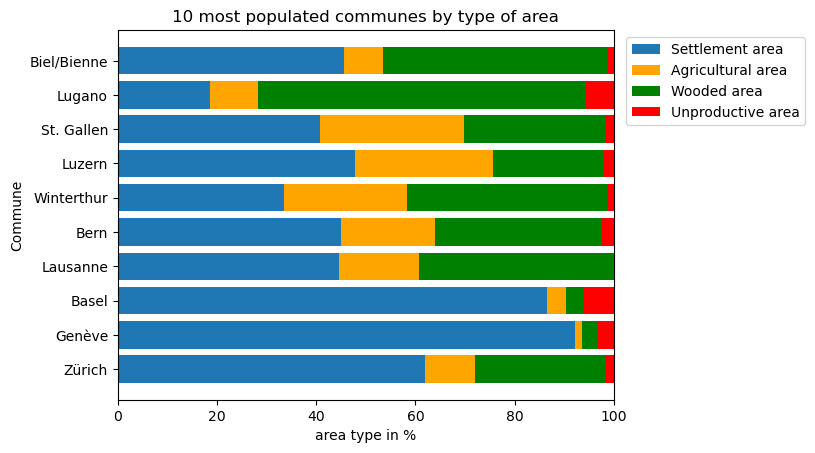

In [21]:
# 2

# Preparing the data

areas = df.sort_values(by="Residents", ascending=False)[["Commune", "Settlement area", "Agricultural area", "Wooded area", "Unproductive area"]].head(10)

settlement = areas["Settlement area"].to_numpy()
agri = areas["Agricultural area"].to_numpy()
wood = areas["Wooded area"].to_numpy()
unproductive = areas["Unproductive area"].to_numpy()

commune = areas["Commune"].to_list()

plt.barh(commune, settlement, label ="Settlement area")
plt.barh(commune, settlement+agri,color="orange", left=settlement, label="Agricultural area")
plt.barh(commune, settlement+agri+wood, color="green", left=settlement+agri, label="Wooded area")
plt.barh(commune, settlement+agri+wood+unproductive, color="red", left=settlement+agri+wood, label="Unproductive area")


# Just putting the legend outside the plot

plt.legend(loc="upper right", bbox_to_anchor=[1.4,1])

plt.xlim(0,100)
plt.title("10 most populated communes by type of area")
plt.xlabel("area type in %")
plt.ylabel("Commune")

plt.show()

We see that the largest area portion of the most populated communes in Switzerland is, most of the time and without surprise, consisting of settlements areas. In the case of Basel, Geneva and Zurich, we see that there is no room for wooded or agricultural areas. 

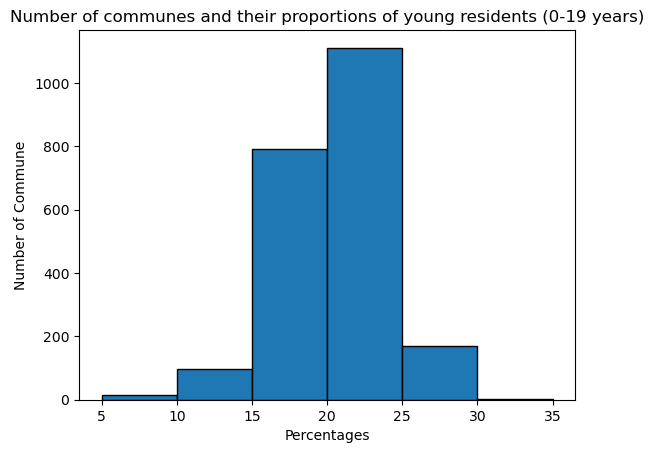

<Figure size 500x400 with 0 Axes>

In [22]:
#3

hist = df["0-19 years"].plot.hist(bins=range(5,40,5),
                                  edgecolor="black")
hist.set_xlabel("Percentages")
hist.set_ylabel("Number of Commune")
hist.set_title("Number of communes and their proportions of young residents (0-19 years)")

plt.figure(figsize=(5,4))
plt.show()

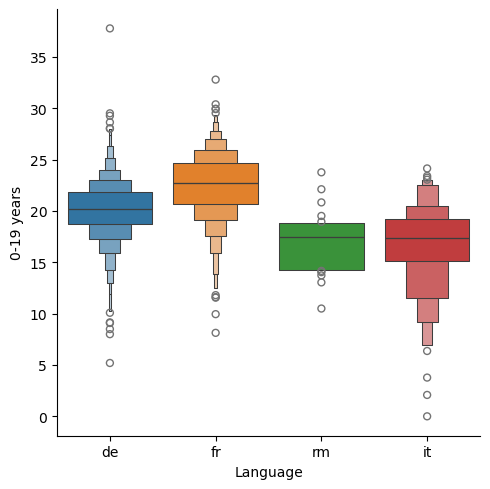

In [23]:
#4

sns.catplot(data=df,
            x=df["Language"],
            y=df["0-19 years"],
           kind="boxen",
           hue=df["Language"])

plt.show()

The mean, for each language group, is represented by the horizontal bar in the biggest box. We see that the mean of the French-speaking is higher than the other ones. So we can say that, in the communes where people speak French, the portion of people between 0 and 19 years is bigger than in the others region. So in general, French-speaking people are younger. 

We can also see that in Ticino, there are regions where the proportion of young people is incredibly low and far from the mean (represented by the four lowest points above the "it" label)

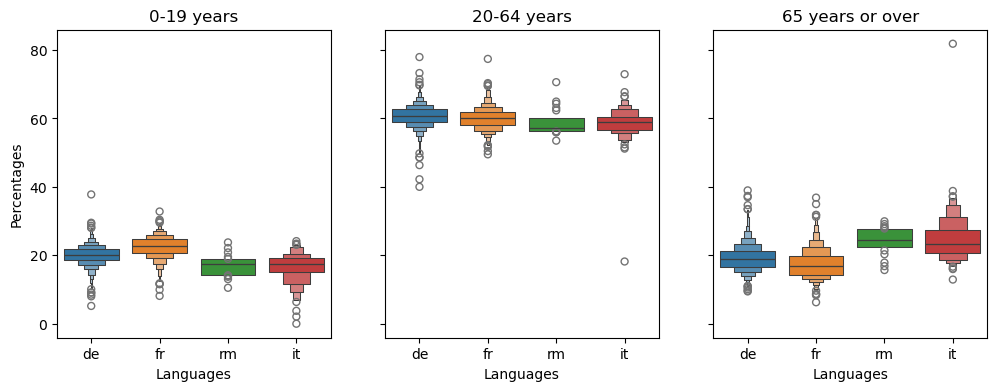

In [24]:
#5

fig, axes = plt.subplots(nrows=1,
                        ncols=3,
                        figsize=(12,4),
                        sharey=True)


sns.boxenplot(data=df,
            x=df["Language"],
            y=df["0-19 years"],
            hue=df["Language"],
            ax=axes[0])

axes[0].set_title("0-19 years")
axes[0].set_ylabel("Percentages")
axes[0].set_xlabel("Languages")

sns.boxenplot(data=df,
            x=df["Language"],
            y=df["20-64 years"],
            hue=df["Language"],
            ax=axes[1])

axes[1].set_title("20-64 years")
axes[1].set_ylabel("")
axes[1].set_xlabel("Languages")
                        
sns.boxenplot(data=df,
            x=df["Language"],
            y=df["65 years or over"],
            hue=df["Language"],
            ax=axes[2])       

axes[2].set_title("65 years or over")
axes[2].set_ylabel("")
axes[2].set_xlabel("Languages")

#plt.title("Distribution of different age groups accrosss four language regions")
plt.show()

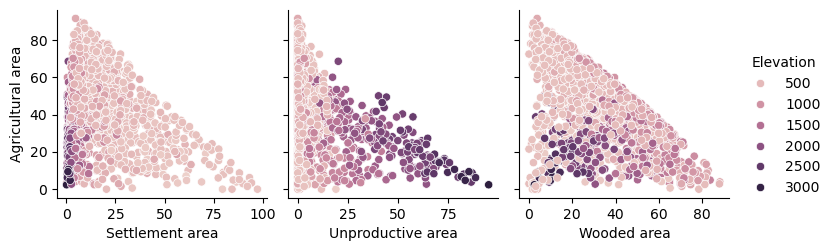

In [25]:
#6 

areas= sns.pairplot(data=df,
             x_vars=["Settlement area","Unproductive area", "Wooded area"],
             y_vars="Agricultural area",
             hue="Elevation",
             diag_kind=None)
plt.show()


We can see that relations overall are not linear. But we can still notice something when we add the elevation parameter. Let's have a look at the first plot (the one on the left-hand side). 

We can notice that there is no correlation between "settlement area" and "agricultural area" for the communes with a high elevation. But, as the elevation gets lower, we see that the clear points (representing the communes with low elevation) seem to get closer to the negative slope regression line. That means that for communes in plains, we have a negative linear relation between the repartition of agricultural and settlement areas.

We can make the same observation for communes in altitude for the agricultural and unproductive areas. 



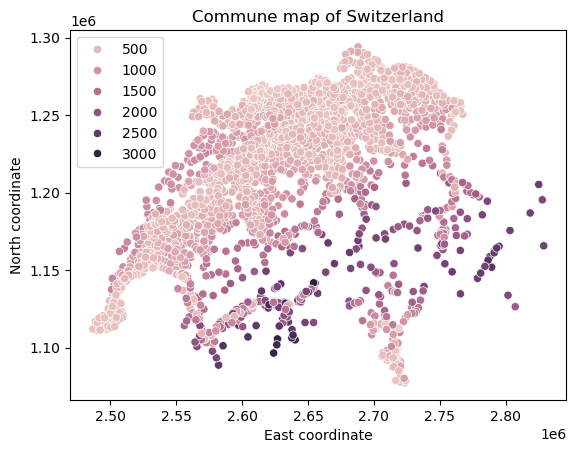

In [26]:
# 7

graph_1=sns.scatterplot(data=df,
                x = df["East coordinate"],
                y = df["North coordinate"],
                hue = df["Elevation"]) 
plt.legend(loc="upper left")
plt.title("Commune map of Switzerland")
plt.show()


This plot is a nice way to see the topography of Switzerland with the average elevation by commune.
We can see that the darkest dots are more in the south of the country, on the contrary the clearest are more in the north. We understand where the alps are located. 

We can also notice the Jura and the Pre-Alps, with average elevations around 1500, that are "bordering" the plains with altitude of around 500m. 

We can conclude that there are more communes in the plains and urban areas, although they cover less territory than those in the Alps. 

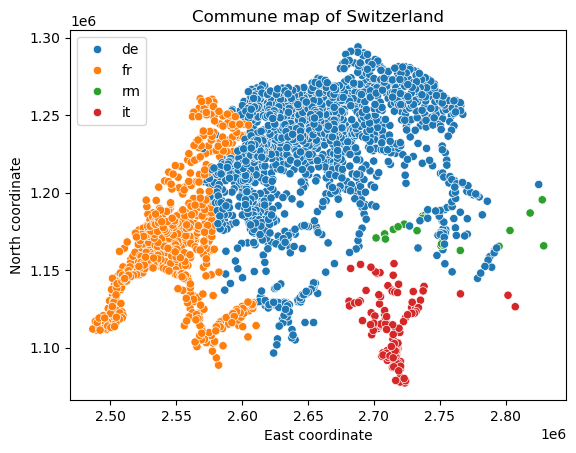

In [27]:
graph_2 = sns.scatterplot(data=df,
                x = df["East coordinate"],
                y = df["North coordinate"],
                hue = df["Language"]) 
plt.title("Commune map of Switzerland")
plt.legend(loc="upper left")
plt.show()

Here we can see that the main languages in Switzerland are German and French as we can see there are more communes where people speak those languages than italian and romansch. 

What for me is interesting is that the romansch communes are the Romand communes are scattered, according to their number and where they are distributed. 

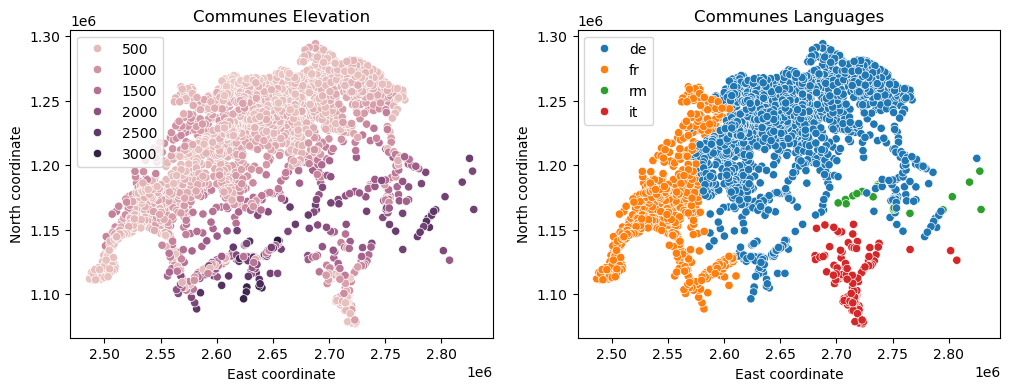

In [28]:
#8 

fig, axes = plt.subplots(nrows=1, 
                       ncols=2,
                       figsize =(12,4),
                       sharey=False)

graph_1=sns.scatterplot(data=df,
                x = df["East coordinate"],
                y = df["North coordinate"],
                hue = df["Elevation"],
                ax=axes[0])

axes[0].set_title("Communes Elevation")
axes[0].legend(loc="upper left")

graph_2 = sns.scatterplot(data=df,
                x = df["East coordinate"],
                y = df["North coordinate"],
                hue = df["Language"],
                ax = axes[1]) 

axes[1].set_title("Communes Languages")
axes[1].legend(loc="upper left")


plt.show()

# D. Probabilities

We are computing the following probability, according to definition of conditional probability :

$$
P(\text{pick a commune in Valais} \mid \text{pick a commune above 2000m}) = \frac{P(\text{pick a commune in Valais} \cap \text{above 2000m})}{P(\text{pick a commune above 2000m})}
$$

Now lets just be clear on these points before following:

For any A event, $P(A)$ is statistically computed following this rule: 

$$P(A)= \frac{\text{number of success}}{\text{number of experiments}}$$

The more the number of experiments gets high, the more the value of P(A) we get is precise. 

Here, to compute P, we want to calculate the probabilities:

$$ 
P_1=P(\text{pick a commune in Valais} \cap \text{above 2000m})
$$

and

$$P_2 = P(\text{pick a commune above 2000m})$$

And then calculate $P=P_1/P_2$. Lets develop this equality:

$$ 
P = \frac{P_1}{P_2} = \frac{\text{number of success exp1}}{\text{number of experiments}} \div \frac{\text{number of success exp2}}{\text{number of experiments}}  
$$

So now this identity simplies into:

$$
P = \frac{\text{number of success exp1}}{\text{number of success exp2}}
$$

Note that it doesnt means that P does not depend on the number of experiments, as the number of success for the two experiments depends themselves on the number of experiments







In [29]:
experiments = 40000
counter_1 = 0 #counter for P_1
counter_2 = 0 #counter for P_2

for i in range(experiments):
    position = random.randrange(df.shape[0])
    canton = df.iloc[position]["Canton"]
    elevation = df.iloc[position]["Elevation"]
    if elevation > 2000:
        counter_2+=1
        if canton=="VS":
            counter_1+=1

counter_1/counter_2

0.5016797312430011

Here we will verify our result with the theoretical probability we would get by calculating. 

In [30]:
#number of communes

df.shape[0]

2191

In [31]:
#number of communes in Valais

df[df["Canton"]=="VS"].shape[0]

126

In [32]:
# number of communes with their average elevation higher than 2000m

df[df["Elevation"]>2000].shape[0]

96

In [33]:
#number of communes in Valais AND with average elevation higher than 2000m

df[(df["Canton"]=="VS") & (df["Elevation"]>2000)].shape[0]

49

Now that we now that we have 2192 communes overall, 126 communes in Valais, 96 above 2000m and 49 that are in Valais and above 2000m, the probability is given by:

In [34]:
df[(df["Canton"]=="VS") & (df["Elevation"]>2000)].shape[0]/df[df["Elevation"]>2000].shape[0]

0.5104166666666666

Which is pretty close to the probability we got above.

# E. Matrices

In [45]:
#construction of a data frame matrix filled by 0,1
#a cell (i,j) takes value 1 if the commune (i) is situated in the canton (j)

df_matrix = pd.DataFrame(index = df.Commune, columns= df.Canton.unique(), dtype=np.float64)
df_matrix.fillna(0, inplace=True)

#we need to define the datatype as float64 otherwise we get a error message due to the second line of our code

for commune in df_matrix.index:
    canton = df[df["Commune"]==commune].Canton.to_list()
    canton="".join(canton)
    df_matrix.loc[commune,canton]=1
    
df_matrix=df_matrix.astype(np.int64)

#we change again the datatype the matrix looks nicer

df_matrix

,ZH,BE,LU,UR,SZ,OW,NW,GL,ZG,FR,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
Commune,,,,,,,,,,,,,,,,,,,,,
Aeugst am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Affoltern am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bonstetten,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hausen am Albis,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hedingen,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vendlincourt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Basse-Allaine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Clos du Doubs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Appendix

I made sure to not use any AI tools to build my codes, only the documentation provided by the different Python Libraries and some Stack Overflow pages. Here are the documentation websites that I used to do this project (showing to you every pages consulted would be to long):

https://pandas.pydata.org/docs/reference/index.html

https://seaborn.pydata.org/api.html

https://numpy.org/doc/stable/reference/index.html

https://matplotlib.org/stable/api/index.html

And here are the Stack Overflow pages I consulted:

https://stackoverflow.com/questions/52086574/pandas-isna-and-isnull-what-is-the-difference

https://stackoverflow.com/questions/74663328/what-is-a-pandas-core-frame-dataframe-and-how-to-convert-it-to-pd-dataframe

https://stackoverflow.com/questions/68152902/extracting-only-object-type-columns-in-a-separate-list-from-a-data-frame-in-pand

https://stackoverflow.com/questions/71340581/having-pandas-astype-give-type-conditionally

https://stackoverflow.com/questions/64067424/how-to-convert-df-info-into-data-frame-df-info

https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib

https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

https://stackoverflow.com/questions/59917053/seaborn-and-matplotlib-control-legend-in-subplots

https://stackoverflow.com/questions/19666626/replace-all-elements-of-numpy-array-that-are-greater-than-some-value

https://stackoverflow.com/questions/1704823/create-numpy-matrix-filled-with-nans